In [1]:
import pandas as pd
import numpy as np

np.set_printoptions(precision=2)

In [2]:
# Download the dataset

import os
import wget

dataset_url = 'https://github.com/GopalSaraf/Practicals/releases/download/ML-Datasets/temperatures.csv'

if not os.path.exists('temperatures.csv'):
    wget.download(dataset_url)

In [3]:
# Create dataframe
df = pd.read_csv("temperatures.csv")

In [4]:
df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03


In [5]:
# Correlation of 'YEAR' with other coloumns
df.corr()["YEAR"]

YEAR       1.000000
JAN        0.575499
FEB        0.647066
MAR        0.553886
APR        0.540662
MAY        0.407648
JUN        0.371840
JUL        0.478512
AUG        0.654138
SEP        0.664008
OCT        0.589073
NOV        0.697887
DEC        0.732222
ANNUAL     0.801129
JAN-FEB    0.679869
MAR-MAY    0.640438
JUN-SEP    0.677061
OCT-DEC    0.749792
Name: YEAR, dtype: float64

In [6]:
# As 'YEAR' is highly correlated with 'ANNUAL' coloumn, Will train model on 'YEAR' and 'ANNUAL'

X = df["YEAR"].values
Y = df["ANNUAL"].values

In [7]:
X

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [8]:
Y

array([28.96, 29.22, 28.47, 28.49, 28.3 , 28.73, 28.65, 28.83, 28.38,
       28.53, 28.62, 28.95, 28.67, 28.66, 28.94, 28.82, 28.11, 28.66,
       28.66, 28.76, 28.86, 28.8 , 28.74, 28.8 , 28.67, 28.7 , 28.59,
       28.98, 28.76, 28.65, 29.15, 29.09, 28.49, 29.03, 28.76, 28.71,
       28.7 , 28.7 , 28.85, 28.88, 29.46, 28.98, 28.8 , 28.89, 28.97,
       29.37, 28.84, 28.73, 28.89, 28.47, 29.09, 29.16, 29.43, 28.92,
       28.76, 28.63, 28.64, 29.34, 29.02, 29.31, 28.72, 28.89, 29.04,
       29.09, 29.16, 29.41, 29.14, 29.07, 29.61, 29.47, 29.15, 29.31,
       29.44, 29.26, 28.89, 29.27, 29.41, 29.23, 29.63, 29.58, 29.32,
       29.12, 29.11, 29.28, 29.61, 29.33, 29.72, 29.55, 29.18, 29.14,
       29.32, 29.23, 29.55, 29.46, 30.18, 29.58, 29.05, 29.7 , 29.81,
       29.75, 29.99, 30.23, 29.75, 29.79, 29.6 , 30.06, 29.84, 29.64,
       30.3 , 30.13, 29.82, 29.81, 29.81, 29.72, 29.9 , 31.63, 31.42])

In [9]:
# Splitting dataset in train test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(93,)
(24,)
(93,)
(24,)


In [11]:
# Applying normalization on X

from sklearn.preprocessing import StandardScaler

X_scalar = StandardScaler()
X_train = X_scalar.fit_transform(X_train.reshape(-1, 1))
X_train

array([[-0.89],
       [ 0.16],
       [ 1.39],
       [ 0.54],
       [ 0.34],
       [ 0.22],
       [ 0.8 ],
       [ 1.1 ],
       [ 1.21],
       [-1.21],
       [-1.56],
       [ 1.3 ],
       [-0.24],
       [ 1.45],
       [-0.56],
       [-0.39],
       [ 0.28],
       [-1.41],
       [ 0.72],
       [-0.19],
       [ 0.78],
       [-0.04],
       [ 0.6 ],
       [ 0.4 ],
       [ 1.36],
       [ 0.25],
       [ 0.86],
       [-0.74],
       [ 0.46],
       [-1.32],
       [-0.83],
       [ 1.74],
       [-0.42],
       [ 1.04],
       [-1.58],
       [-1.03],
       [-1.35],
       [-0.13],
       [ 1.65],
       [-0.68],
       [ 1.68],
       [-1.12],
       [-1.  ],
       [-1.24],
       [ 1.59],
       [-1.38],
       [-1.44],
       [-0.8 ],
       [ 1.56],
       [ 0.48],
       [-1.18],
       [-1.15],
       [-1.61],
       [ 1.47],
       [-0.45],
       [-0.48],
       [ 1.42],
       [-0.91],
       [ 0.75],
       [ 1.24],
       [ 0.02],
       [-0.71],
       [

In [12]:
# Applying normalization on Y

Y_scalar = StandardScaler()
Y_train = Y_scalar.fit_transform(Y_train.reshape(-1, 1))
Y_train

array([[-1.09],
       [-0.24],
       [ 0.82],
       [ 0.2 ],
       [ 0.84],
       [-0.01],
       [ 0.84],
       [ 1.91],
       [ 1.21],
       [-0.65],
       [-1.27],
       [ 2.  ],
       [-0.52],
       [ 1.27],
       [-0.88],
       [-0.52],
       [-0.05],
       [-1.48],
       [-0.09],
       [-0.14],
       [ 0.21],
       [-1.01],
       [ 0.12],
       [-0.03],
       [ 1.17],
       [ 0.46],
       [ 1.04],
       [-0.14],
       [ 0.52],
       [-0.41],
       [-0.77],
       [ 4.25],
       [-0.69],
       [ 0.72],
       [-1.31],
       [-0.69],
       [-1.03],
       [ 0.5 ],
       [ 1.04],
       [-0.26],
       [ 1.38],
       [-0.95],
       [-0.8 ],
       [-0.43],
       [ 1.21],
       [-1.2 ],
       [-0.63],
       [-0.97],
       [ 1.23],
       [ 0.18],
       [-1.99],
       [-0.95],
       [ 0.1 ],
       [ 0.89],
       [-0.35],
       [ 0.55],
       [ 1.68],
       [-0.88],
       [-0.11],
       [ 1.1 ],
       [ 0.33],
       [-1.27],
       [

In [13]:
# Creating the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [14]:
# Training the model
model.fit(X_train, Y_train)

LinearRegression()

In [15]:
# Checking first test prediction
print(f"First X in X_test : {X_test[0]}")

# Scaling the X_test[0]
scaled_X_test_0 = X_scalar.transform([[X_test[0]]])
prediction = model.predict(scaled_X_test_0)

# Inverse scaling the prediction
prediction = Y_scalar.inverse_transform(prediction)

print(f"Actual Y    : {Y_test[0]}")
print(f"Predicted Y : {prediction[0][0]}")

First X in X_test : 1981
Actual Y    : 29.32
Predicted Y : 29.46693641559466


In [16]:
# Checking all predictions
Y_pred = model.predict(X_scalar.transform(X_test.reshape(-1, 1)))

Y_pred = Y_scalar.inverse_transform(Y_pred)
np.concatenate((Y_pred.reshape(len(Y_pred), 1), Y_test.reshape(len(Y_test), 1)), 1)

array([[29.47, 29.32],
       [29.1 , 29.16],
       [29.67, 29.05],
       [29.75, 29.75],
       [29.87, 29.81],
       [29.03, 28.84],
       [29.01, 28.97],
       [29.35, 29.31],
       [28.95, 28.88],
       [29.2 , 29.31],
       [29.58, 29.14],
       [29.91, 31.63],
       [28.89, 28.71],
       [29.53, 29.33],
       [28.7 , 28.86],
       [29.61, 29.23],
       [29.25, 29.09],
       [29.05, 28.73],
       [29.16, 28.64],
       [28.69, 28.76],
       [28.6 , 28.67],
       [28.74, 28.8 ],
       [29.84, 30.13],
       [29.44, 29.63]])

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# MSE
mse = mean_squared_error(Y_pred, Y_test)

# MAE
mae = mean_absolute_error(Y_pred, Y_test)

# R2 Score
r2 = r2_score(Y_pred, Y_test)

In [18]:
print(f"Mean Squared Error  :  {mse}")
print(f"Mean Absolute Error :  {mae}")
print(f"R2 Score            :  {r2}")

Mean Squared Error  :  0.1829467997060649
Mean Absolute Error :  0.2543052417368214
R2 Score            :  -0.1895756243711033


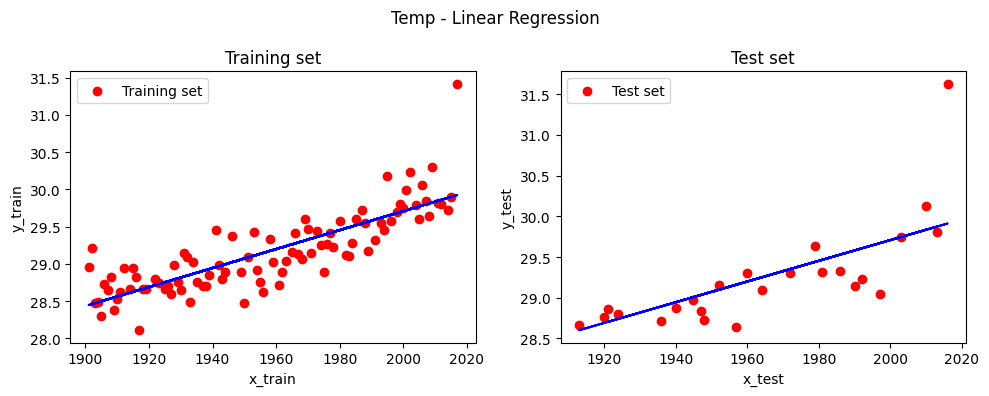

In [19]:
from plot import plot

# Visualize simple regression model

X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_scalar.transform(X_test.reshape(-1, 1)))

X_train_ = X_scalar.inverse_transform(X_train)
Y_train_ = Y_scalar.inverse_transform(Y_train)

X_train_pred_ = Y_scalar.inverse_transform(X_train_pred)
X_test_pred_ = Y_scalar.inverse_transform(X_test_pred)

plot(
    subtitle="Temp - Linear Regression",
    x_train=X_train_,
    y_train=Y_train_,
    x_test=X_test,
    y_test=Y_test,
    x_train_pred=X_train_pred_,
    x_test_pred=X_test_pred_,
)